# <font color = red> Tarea


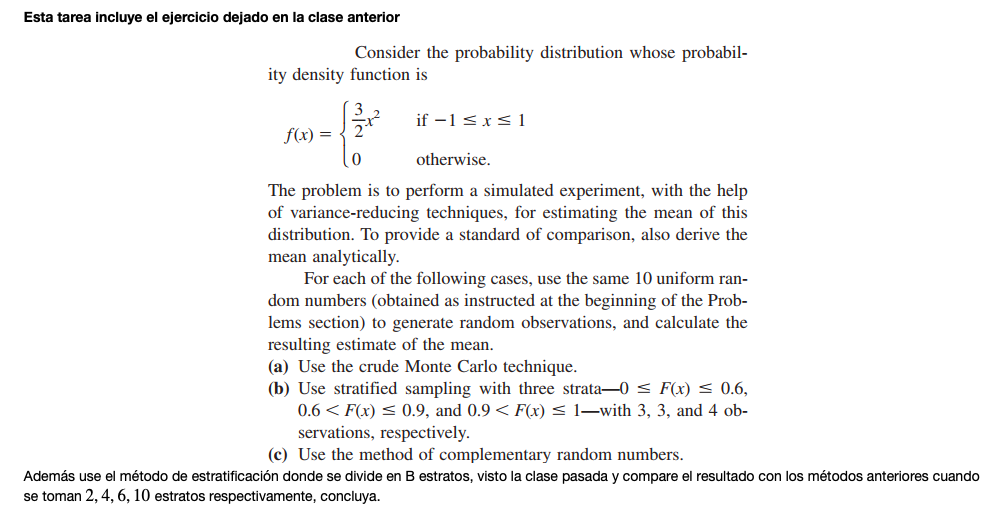

In [ ]:
#Librerías

In [ ]:
#Estudiante 1

In [ ]:
#Estudiante 2